In [51]:
# helper functions for displaying table data

import numpy as np
from IPython.display import display_html

# n is the number of columns to display data in
def display_side_by_side(series_obj, n):
    df = pd.DataFrame(series_obj)
    partition = int(round(len(df) / n))
    lower_bound = 0
    upper_bound = partition
    args = []
    for i in range(n):
        args.append(df[lower_bound:upper_bound])
        lower_bound += partition
        upper_bound += partition
    helper(args)

def helper(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [52]:
INCLUDE_MURDER = False

In [53]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv

if INCLUDE_MURDER:
    df = pd.read_csv('data_with_murder.csv')
else:
    df = pd.read_csv('data.csv')
df.head()

,ID,xobsyr_0,State,City,Region,zipcode,agyaddr,adol,female,nonwhite,unemplmt,B2a_0,noins,prsatx,tottxp4,TRI_0,TRIg_0,primsev,GVS,gvsg,tsd_0,und15,CWS_0,CWSg_0,srprob8,srprobg,S9y10,dldiag,press,DSS9_0,dssg_0,EPS7p_0,epsg_0,ADHDs_0,adhdg_0,CDS_0,cdsg_0,suicprbs_0,CJSI_0,cjsig_0,LRI7_0,lrig_0,SRI7_0,srig_0,homeless_0,S6,PSSI_0,pssig_0,RERI13p_0,rerig_0,ncar,SFS8p_0,SFS8p_3,SFS8p_6,SFS8p_12,loc,loc3,loc5,racegrps,raceg5,Raceg4,famhist,P12e,wkfls,dcfscps,wkyfmp_0,PAI_0,PAIg_0,sglpar_0,FPS_0,fpsg_0,POPI,POPIgrp,AFSS_0,afssg_0,TPS_0,tpsg_0,GSSI_0,gssig_0,PMS18,PMSg,IMS8,IMSg,glbtq55,SES_0,SESg_0,GCCA_0,gccag_0,DISCSTATg,TxSS_0,txsat,M5d_0,S7e5_0,r4ag_0,TxRS_0,family_0,ebtx,Marijuana_Days0,Marijuana_Cens0,Marijuana_Days5,Marijuana_Cens5,Illicit_Cens0,Illicit_Days0,Illicit_Cens5,Illicit_Days5
0,1,2003,FL,St. Petersburg,4,33781-5033,6655 66th Street,1,0,0,0,15,0,0,12,0,0,3,2,1,0,1,1,1,5,1,1,1,1,4,1,0.000000,0,0,0,0,0,0,0.0,0,12,2,19,2,0,0,0,0,32.564103,1,0,14.861111,,.416666666666667,19.4444444444444,4,1,1,4,3,1,,-8,1,0,1,5,0,0,0,0,-8.000000,-8,0,0,6,2,8,0,-3,-3,-3,-3,0,5,0,0,0,2,-9,,1,0,2,0,0,1,365,2,365,2,2,365,2,365
1,2,2004,FL,St. Petersburg,4,33781-5033,6655 66th Street,1,0,0,1,16,0,0,7,3,2,3,0,0,0,1,2,1,5,1,8,,0,0,0,2.380952,0,0,0,0,0,0,0.0,0,8,1,13,2,0,0,0,0,15.641026,0,0,14.444444,9.30555555555555,8.88888888888889,,4,1,1,4,3,1,0,0,0,0,0,5,0,0,0,0,-8.000000,-8,0,0,7,2,3,1,-3,-3,-3,-3,0,5,0,0,0,2,-9,0,0,0,1,0,0,1,3,0,3,0,0,12,0,12
2,3,2005,FL,St. Petersburg,4,33781-5033,6655 66th Street,1,1,0,0,14,1,0,9,1,1,2,0,0,0,1,0,0,1,0,8,0,1,0,0,0.000000,0,0,0,0,0,0,0.0,0,9,1,12,2,0,0,2,1,21.965812,1,1,0.000000,0,,,4,1,1,4,3,1,1,0,1,0,0,5,0,0,0,0,-8.000000,-8,0,0,5,1,9,0,-3,-3,-3,-3,0,5,0,0,0,2,-9,1,0,0,2,0,0,1,115,2,115,2,2,115,2,115
3,4,2004,FL,St. Petersburg,4,33781-5033,6655 66th Street,1,1,0,0,16,0,0,20,1,1,1,9,2,1,1,8,1,6,2,1,1,1,3,1,15.873016,1,17,2,11,2,0,100.0,2,10,1,15,2,1,1,2,1,35.470085,2,1,7.638889,1.11111111111111,0,0,4,1,1,4,3,1,1,1,1,0,0,2,1,0,3,1,-8.000000,-8,5,1,4,1,9,0,-3,-3,-3,-3,0,3,1,0,0,2,-9,0,1,0,2,0,0,1,40,0,40,0,0,40,0,40
4,5,2004,FL,St. Petersburg,4,33781-5033,6655 66th Street,1,0,0,0,15,0,0,16,1,1,3,3,1,0,1,0,0,4,1,8,1,1,7,2,17.460317,1,10,1,2,0,0,0.0,0,12,2,18,2,0,0,1,1,23.760684,1,1,21.250000,0,5.69444444444444,1.38888888888889,4,1,1,4,3,1,0,0,1,0,1,4,0,1,0,0,76.579451,2,1,0,6,2,8,0,-3,-3,-3,-3,0,2,2,0,0,2,-9,0,0,0,0,0,0,1,30,0,30,0,0,60,0,60


In [54]:
df.shape

(24358, 105)

In [55]:
import numpy as np

np.unique(df['B2a_0']).tolist() # confirm that this dataset contains adolescents AND young adults

[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [56]:
# based on Jordan's recommendations
cols_to_use = ['female','nonwhite','unemplmt','prsatx','B2a_0','primsev','loc3','adol','Illicit_Days0',
               'Illicit_Cens0','gvsg','CWSg_0','srprobg','dssg_0','epsg_0','adhdg_0','cdsg_0','cjsig_0','lrig_0',
               'srig_0','pssig_0','rerig_0','racegrps','POPIgrp','afssg_0','tpsg_0','gssig_0','PMSg','IMSg',
               'SESg_0','r4ag_0']
if INCLUDE_MURDER:
    cols_to_use.append('murder_num')

df = df[cols_to_use]
df.head()

,female,nonwhite,unemplmt,prsatx,B2a_0,primsev,loc3,adol,Illicit_Days0,Illicit_Cens0,gvsg,CWSg_0,srprobg,dssg_0,epsg_0,adhdg_0,cdsg_0,cjsig_0,lrig_0,srig_0,pssig_0,rerig_0,racegrps,POPIgrp,afssg_0,tpsg_0,gssig_0,PMSg,IMSg,SESg_0,r4ag_0
0,0,0,0,0,15,3,1,1,365,2,1,1,1,1,0,0,0,0,2,2,0,1,4,-8,0,2,0,-3,-3,0,2
1,0,0,1,0,16,3,1,1,12,0,0,1,1,0,0,0,0,0,1,2,0,0,4,-8,0,2,1,-3,-3,0,1
2,1,0,0,0,14,2,1,1,115,2,0,0,0,0,0,0,0,0,1,2,1,1,4,-8,0,1,0,-3,-3,0,2
3,1,0,0,0,16,1,1,1,40,0,2,1,2,1,1,2,2,2,1,2,1,2,4,-8,1,1,0,-3,-3,1,2
4,0,0,0,0,15,3,1,1,60,0,1,0,1,2,1,1,0,0,2,2,1,1,4,2,0,2,0,-3,-3,2,0


In [57]:
df.shape

(24358, 31)

In [58]:
# convert murder_num to grouped variable (low == 0, med == 1, high == 2)

if INCLUDE_MURDER:
    low = df['murder_num'].min()
    high = df['murder_num'].max()
    third = (high - low) // 3

    print(low, high)

    df['murder_num_grouped'] = pd.cut(df['murder_num'], [low,third,2*third,high], labels=[0, 1, 2])
    df['murder_num_grouped'].value_counts()
    df.drop(columns='murder_num', inplace=True)

In [59]:
# remove rows that don't have our predictor feature

df = df[df.Illicit_Days0 != ' ']
df.shape

(24299, 31)

In [60]:
# cast data to int or float if possible, otherwise leave as is
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [61]:
# verify all the columns are numerical types
display_side_by_side(df.dtypes, 7)

,0
female,int64
nonwhite,float64
unemplmt,float64
prsatx,float64
,0
B2a_0,int64
primsev,float64
loc3,float64
adol,int64
,0


In [62]:
# ad hoc way of getting censoring to be correct
df['Illicit_Cens0'] += 3 # add 3 to prevent overlapping replacement
# no relapse and censored data needs to be censored in the overall model
df.replace({'Illicit_Cens0': {3: 1, 4: 0, 5:0}}, inplace=True) # 3 == relapsed, 4 == no relapse, 5 == censored
df['Illicit_Cens0'].value_counts()

0    17202
1     7097
Name: Illicit_Cens0, dtype: int64

In [63]:
# calculate percentage of NaNs in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

display_side_by_side(missing_value_df[missing_value_df.percent_missing > 0], 3) # show features with >0% null values

,column_name,percent_missing
nonwhite,nonwhite,0.032923
unemplmt,unemplmt,0.185193
,column_name,percent_missing
prsatx,prsatx,0.296308
primsev,primsev,0.016462
,column_name,percent_missing
loc3,loc3,5.345899
srprobg,srprobg,0.004115


In [64]:
# sorting parameters based on Jordan's paper on Opioids
df.sort_values(by=['gvsg', 'female', 'nonwhite', 'B2a_0'], ascending=False, inplace=True)
df.drop(columns='B2a_0', inplace=True) # drop bc age is not a grouped variable

In [65]:
# 'ffill' stands for 'forward fill' and will propagate last valid observation forward 

for column in df.columns:
    df[column].fillna(method='ffill', inplace=True)

In [66]:
# calculate percentage of NaNs in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

missing_value_df[missing_value_df.percent_missing > 0] # show features with >0% null values

,column_name,percent_missing


In [67]:
# mark data based on which drugs were most severe for that patient
alcohol_sev = df['primsev'] == 1 # alcohol
marijuana_sev = df['primsev'] == 3 # marijuana
temp = alcohol_sev + marijuana_sev
df['checkin_flag'] = temp
df['checkin_flag'] = df.checkin_flag.astype(int)
df.head()

,female,nonwhite,unemplmt,prsatx,primsev,loc3,adol,Illicit_Days0,Illicit_Cens0,gvsg,CWSg_0,srprobg,dssg_0,epsg_0,adhdg_0,cdsg_0,cjsig_0,lrig_0,srig_0,pssig_0,rerig_0,racegrps,POPIgrp,afssg_0,tpsg_0,gssig_0,PMSg,IMSg,SESg_0,r4ag_0,checkin_flag
11087,1,1.0,0.0,0.0,6.0,1.0,0,365,0,2,1,1.0,1,2,0,0,2,1,1,-3,-3,5,-8,1,0,-3,-3,-3,1,2.0,0
12625,1,1.0,1.0,1.0,1.0,1.0,0,96,0,2,0,1.0,1,1,0,0,0,1,0,-3,-3,5,3,1,0,-3,-3,-3,1,1.0,1
16104,1,1.0,1.0,0.0,1.0,1.0,0,351,0,2,0,1.0,1,1,0,0,0,1,2,-3,-3,5,1,1,-3,-3,-3,-3,0,2.0,1
16303,1,1.0,1.0,1.0,6.0,1.0,0,365,0,2,0,2.0,1,0,0,1,0,1,1,-3,-3,5,-8,0,-3,-3,-3,-3,0,2.0,0
16315,1,1.0,0.0,0.0,2.0,1.0,0,365,0,2,0,1.0,1,1,0,0,0,1,1,-3,-3,5,-8,1,0,-3,-3,-3,0,1.0,0


In [68]:
df.shape

(24299, 31)

In [69]:
# one-hot encode grouped vars
grouped_vars = ['gvsg','CWSg_0','srprobg','dssg_0','epsg_0','adhdg_0','cdsg_0','cjsig_0','lrig_0',
               'srig_0','pssig_0','rerig_0','racegrps','POPIgrp','afssg_0','tpsg_0','gssig_0','PMSg','IMSg',
               'SESg_0','r4ag_0','primsev']

if INCLUDE_MURDER:
    grouped_vars.append('murder_num_grouped')

for col in grouped_vars:
    one_hot = pd.get_dummies(df[col], prefix=col)
    df = df.drop(col,axis = 1)
    df = df.join(one_hot)

df.head()

,female,nonwhite,unemplmt,prsatx,loc3,adol,Illicit_Days0,Illicit_Cens0,checkin_flag,gvsg_-8,gvsg_-4,gvsg_0,gvsg_1,gvsg_2,CWSg_0_-8,CWSg_0_-4,CWSg_0_0,CWSg_0_1,CWSg_0_2,srprobg_0.0,srprobg_1.0,srprobg_2.0,dssg_0_-8,dssg_0_-7,dssg_0_-4,dssg_0_0,dssg_0_1,dssg_0_2,epsg_0_-8,epsg_0_-4,epsg_0_0,epsg_0_1,epsg_0_2,adhdg_0_-8,adhdg_0_-7,adhdg_0_-4,adhdg_0_0,adhdg_0_1,adhdg_0_2,cdsg_0_-8,cdsg_0_-7,cdsg_0_-4,cdsg_0_0,cdsg_0_1,cdsg_0_2,cjsig_0_-8,cjsig_0_-7,cjsig_0_-4,cjsig_0_0,cjsig_0_1,cjsig_0_2,lrig_0_-8,lrig_0_-7,lrig_0_-4,lrig_0_0,lrig_0_1,lrig_0_2,srig_0_-8,srig_0_-7,srig_0_-4,srig_0_0,srig_0_1,srig_0_2,pssig_0_-8,pssig_0_-7,pssig_0_-4,pssig_0_-3,pssig_0_0,pssig_0_1,pssig_0_2,rerig_0_-8,rerig_0_-7,rerig_0_-4,rerig_0_-3,rerig_0_0,rerig_0_1,rerig_0_2,racegrps_-8,racegrps_-4,racegrps_1,racegrps_2,racegrps_3,racegrps_4,racegrps_5,racegrps_6,racegrps_7,POPIgrp_-8,POPIgrp_-7,POPIgrp_-4,POPIgrp_-3,POPIgrp_1,POPIgrp_2,POPIgrp_3,POPIgrp_4,POPIgrp_5,afssg_0_-8,afssg_0_-7,afssg_0_-4,afssg_0_0,afssg_0_1,afssg_0_2,tpsg_0_-8,tpsg_0_-7,tpsg_0_-4,tpsg_0_-3,tpsg_0_0,tpsg_0_1,tpsg_0_2,gssig_0_-8,gssig_0_-7,gssig_0_-4,gssig_0_-3,gssig_0_0,gssig_0_1,gssig_0_2,PMSg_-8,PMSg_-7,PMSg_-4,PMSg_-3,PMSg_0,PMSg_1,PMSg_2,IMSg_-8,IMSg_-7,IMSg_-4,IMSg_-3,IMSg_0,IMSg_1,IMSg_2,SESg_0_-8,SESg_0_-7,SESg_0_-4,SESg_0_0,SESg_0_1,SESg_0_2,r4ag_0_0.0,r4ag_0_1.0,r4ag_0_2.0,primsev_1.0,primsev_2.0,primsev_3.0,primsev_4.0,primsev_5.0,primsev_6.0
11087,1,1.0,0.0,0.0,1.0,0,365,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
12625,1,1.0,1.0,1.0,1.0,0,96,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
16104,1,1.0,1.0,0.0,1.0,0,351,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
16303,1,1.0,1.0,1.0,1.0,0,365,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
16315,1,1.0,0.0,0.0,1.0,0,365,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


In [70]:
# subset data based on whether the patient lived at the clinic or not
df = df[df.loc3 != 2]
df.drop(columns=['loc3', 'primsev_2.0'], inplace=True)
df.shape

(22215, 142)

In [71]:
df.head()

,female,nonwhite,unemplmt,prsatx,adol,Illicit_Days0,Illicit_Cens0,checkin_flag,gvsg_-8,gvsg_-4,gvsg_0,gvsg_1,gvsg_2,CWSg_0_-8,CWSg_0_-4,CWSg_0_0,CWSg_0_1,CWSg_0_2,srprobg_0.0,srprobg_1.0,srprobg_2.0,dssg_0_-8,dssg_0_-7,dssg_0_-4,dssg_0_0,dssg_0_1,dssg_0_2,epsg_0_-8,epsg_0_-4,epsg_0_0,epsg_0_1,epsg_0_2,adhdg_0_-8,adhdg_0_-7,adhdg_0_-4,adhdg_0_0,adhdg_0_1,adhdg_0_2,cdsg_0_-8,cdsg_0_-7,cdsg_0_-4,cdsg_0_0,cdsg_0_1,cdsg_0_2,cjsig_0_-8,cjsig_0_-7,cjsig_0_-4,cjsig_0_0,cjsig_0_1,cjsig_0_2,lrig_0_-8,lrig_0_-7,lrig_0_-4,lrig_0_0,lrig_0_1,lrig_0_2,srig_0_-8,srig_0_-7,srig_0_-4,srig_0_0,srig_0_1,srig_0_2,pssig_0_-8,pssig_0_-7,pssig_0_-4,pssig_0_-3,pssig_0_0,pssig_0_1,pssig_0_2,rerig_0_-8,rerig_0_-7,rerig_0_-4,rerig_0_-3,rerig_0_0,rerig_0_1,rerig_0_2,racegrps_-8,racegrps_-4,racegrps_1,racegrps_2,racegrps_3,racegrps_4,racegrps_5,racegrps_6,racegrps_7,POPIgrp_-8,POPIgrp_-7,POPIgrp_-4,POPIgrp_-3,POPIgrp_1,POPIgrp_2,POPIgrp_3,POPIgrp_4,POPIgrp_5,afssg_0_-8,afssg_0_-7,afssg_0_-4,afssg_0_0,afssg_0_1,afssg_0_2,tpsg_0_-8,tpsg_0_-7,tpsg_0_-4,tpsg_0_-3,tpsg_0_0,tpsg_0_1,tpsg_0_2,gssig_0_-8,gssig_0_-7,gssig_0_-4,gssig_0_-3,gssig_0_0,gssig_0_1,gssig_0_2,PMSg_-8,PMSg_-7,PMSg_-4,PMSg_-3,PMSg_0,PMSg_1,PMSg_2,IMSg_-8,IMSg_-7,IMSg_-4,IMSg_-3,IMSg_0,IMSg_1,IMSg_2,SESg_0_-8,SESg_0_-7,SESg_0_-4,SESg_0_0,SESg_0_1,SESg_0_2,r4ag_0_0.0,r4ag_0_1.0,r4ag_0_2.0,primsev_1.0,primsev_3.0,primsev_4.0,primsev_5.0,primsev_6.0
11087,1,1.0,0.0,0.0,0,365,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
12625,1,1.0,1.0,1.0,0,96,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
16104,1,1.0,1.0,0.0,0,351,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
16303,1,1.0,1.0,1.0,0,365,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
16315,1,1.0,0.0,0.0,0,365,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [72]:
df.shape

(22215, 142)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a3b8ef0>]],
      dtype=object)

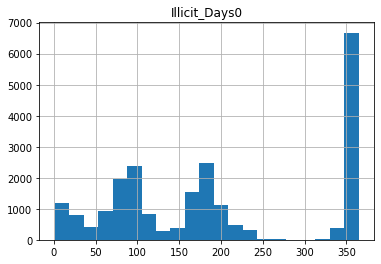

In [73]:
# distribution of our predictor feature
df.hist(column='Illicit_Days0', bins=21)

In [74]:
if INCLUDE_MURDER:
    fname = 'data_cleaned_Illicit_Days0_grouped_with_murder.csv'
else:
    fname = 'data_cleaned_Illicit_Days0_grouped.csv'

df.to_csv(fname)